In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Arctic

In [14]:
HEMISPHERE = 'NH'
DATE = ['1975-01-29','1975-02-04']
MAIN_DIR = 'D:/N5ESMR/N5ESMR_out'

In [13]:
def locate_files_in_date_range(directory, date_range, dir_type='LDTP'):
    files = []
    for date in date_range:
        date_str = date.astype(str).replace('-', '')
        if dir_type == 'LDTP':
            file_path = os.path.join(directory, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_{HEMISPHERE}-{date_str}-fv1.1.nc')
        elif dir_type == 'Kolbe':
            file_path = os.path.join(directory, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_{HEMISPHERE}-{date_str}-fv1.1.nc')
        else:
            raise ValueError("dir_type must be either 'LDTP' or 'Kolbe'")
        if os.path.exists(file_path):
            files.append(file_path)
    return files

In [15]:
LDTP_dir = os.path.join(MAIN_DIR,  'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_'+HEMISPHERE+'-fv1.1')
Kolbe_dir =  os.path.join(MAIN_DIR, 'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_'+HEMISPHERE+'-fv1.1')

date_range = np.arange(np.datetime64(DATE[0]), np.datetime64(DATE[1]) + np.timedelta64(1, 'D'), dtype='datetime64[D]')

LDTP_files = locate_files_in_date_range(LDTP_dir, date_range, dir_type='LDTP')
Kolbe_files = locate_files_in_date_range(Kolbe_dir, date_range, dir_type='Kolbe')
icechart_compare_file = 'C:/Users/emilt/Documents/Noter/N5_ESMR/Paper_plots&Analysis/Comparison/test_19750204.nc'


LDTP_ds = xr.open_mfdataset(LDTP_files, combine='by_coords')
Kolbe_ds = xr.open_mfdataset(Kolbe_files, combine='by_coords')
IC_ds = xr.open_dataset(icechart_compare_file)

Tb = LDTP_ds.Tb.mean(dim='time')
LDTP_SIC = LDTP_ds.ice_conc.mean(dim='time')
Kolbe_SIC = Kolbe_ds.ice_conc.mean(dim='time')
SIC_diff = (LDTP_SIC - Kolbe_SIC).values.squeeze()
lat = LDTP_ds.lat.values
lon = LDTP_ds.lon.values

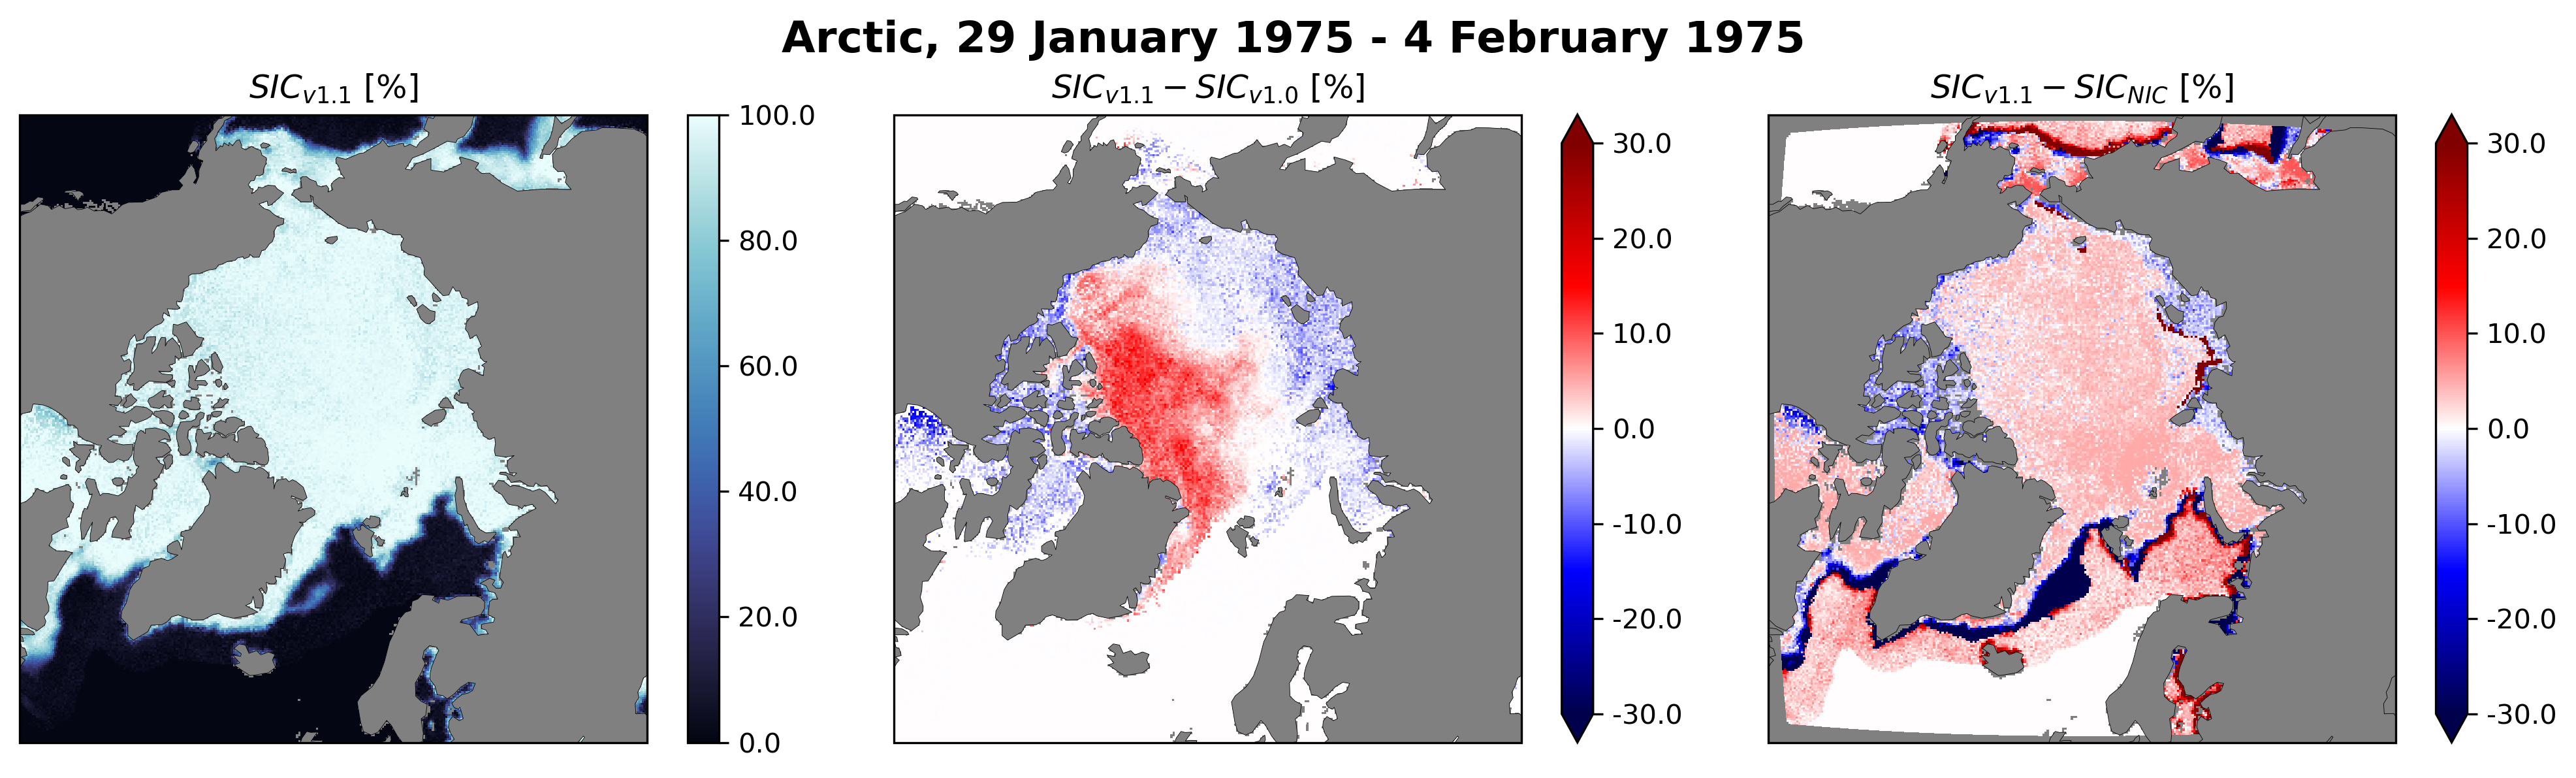

In [16]:
# defining reference frame
if HEMISPHERE == 'NH':
    proj = ccrs.Orthographic(0,90)
    _crs = ccrs.NorthPolarStereo(central_longitude=0)
    scale = 4000000
    name = 'Arctic'
elif HEMISPHERE == 'SH':
    proj = ccrs.Orthographic(0,-90)
    _crs = ccrs.SouthPolarStereo()
    scale = 5000000
    name = 'Antarctic'

land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='none',
                                        facecolor=np.array([0.5,0.5,0.5]))

fig, ax = plt.subplots(1,3,figsize=(13.5, 4),layout='tight', subplot_kw={'projection': proj},dpi=300)
im = ax[0].pcolormesh(lon,lat, LDTP_SIC, vmin=0,vmax=100, transform=ccrs.PlateCarree(), cmap=cmo.ice)
fig.colorbar(im,format='%.1f')
ax[0].set_title('$SIC_{v1.1}$ [%]')
im = ax[1].pcolormesh(lon,lat, SIC_diff, vmin=-30,vmax=30, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='both')
ax[1].set_title('$SIC_{v1.1} - SIC_{v1.0}$ [%]')

im = ax[2].pcolormesh(IC_ds['lon'],IC_ds['lat'],IC_ds['Difference'], vmin=-30,vmax=30, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='both')
ax[2].set_title('$SIC_{v1.1} - SIC_{NIC}$ [%]')
#ax[2].axis('off')

for axs in ax.ravel():
    axs.add_feature(land)
    axs.coastlines(resolution='110m', color='black', linewidth=0.2)
    axs.set_facecolor("gray")
    axs.set_extent((-scale, scale, -scale, scale), crs=_crs)
    #gls = axs.gridlines(alpha=0.2,lw=1,ls=':',draw_labels=True, dms=True, x_inline=False, y_inline=True,color='red', ylabel_style=dict(color='red'),rotate_labels=False  ,ylocs=[60,70,80])
fig.suptitle(name+', ' + '29 January 1975 - 4 February 1975', fontsize=16, fontweight='bold')
plt.show()


# Antarctic

In [7]:
HEMISPHERE = 'SH'
DATE = ['1974-09-01','1974-09-07']
MAIN_DIR = 'D:/N5ESMR/N5ESMR_out'

In [9]:
def locate_files_in_date_range(directory, date_range, dir_type='LDTP'):
    files = []
    for date in date_range:
        date_str = date.astype(str).replace('-', '')
        if dir_type == 'LDTP':
            file_path = os.path.join(directory, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_{HEMISPHERE}-{date_str}-fv1.1.nc')
        elif dir_type == 'Kolbe':
            file_path = os.path.join(directory, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_{HEMISPHERE}-{date_str}-fv1.1.nc')
        else:
            raise ValueError("dir_type must be either 'LDTP' or 'Kolbe'")
        if os.path.exists(file_path):
            files.append(file_path)
    return files

In [10]:
LDTP_dir = os.path.join(MAIN_DIR,  'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_'+HEMISPHERE+'-fv1.1')
Kolbe_dir =  os.path.join(MAIN_DIR, 'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_'+HEMISPHERE+'-fv1.1')

date_range = np.arange(np.datetime64(DATE[0]), np.datetime64(DATE[1]) + np.timedelta64(1, 'D'), dtype='datetime64[D]')

LDTP_files = locate_files_in_date_range(LDTP_dir, date_range, dir_type='LDTP')
Kolbe_files = locate_files_in_date_range(Kolbe_dir, date_range, dir_type='Kolbe')
icechart_compare_file = 'C:/Users/emilt/Documents/Noter/N5_ESMR/Paper_plots&Analysis/Comparison/test_19750204.nc'


LDTP_ds = xr.open_mfdataset(LDTP_files, combine='by_coords')
Kolbe_ds = xr.open_mfdataset(Kolbe_files, combine='by_coords')
IC_ds = xr.open_dataset(icechart_compare_file)

Tb = LDTP_ds.Tb.mean(dim='time')
LDTP_SIC = LDTP_ds.ice_conc.mean(dim='time')
Kolbe_SIC = Kolbe_ds.ice_conc.mean(dim='time')
SIC_diff = (LDTP_SIC - Kolbe_SIC).values.squeeze()
lat = LDTP_ds.lat.values
lon = LDTP_ds.lon.values

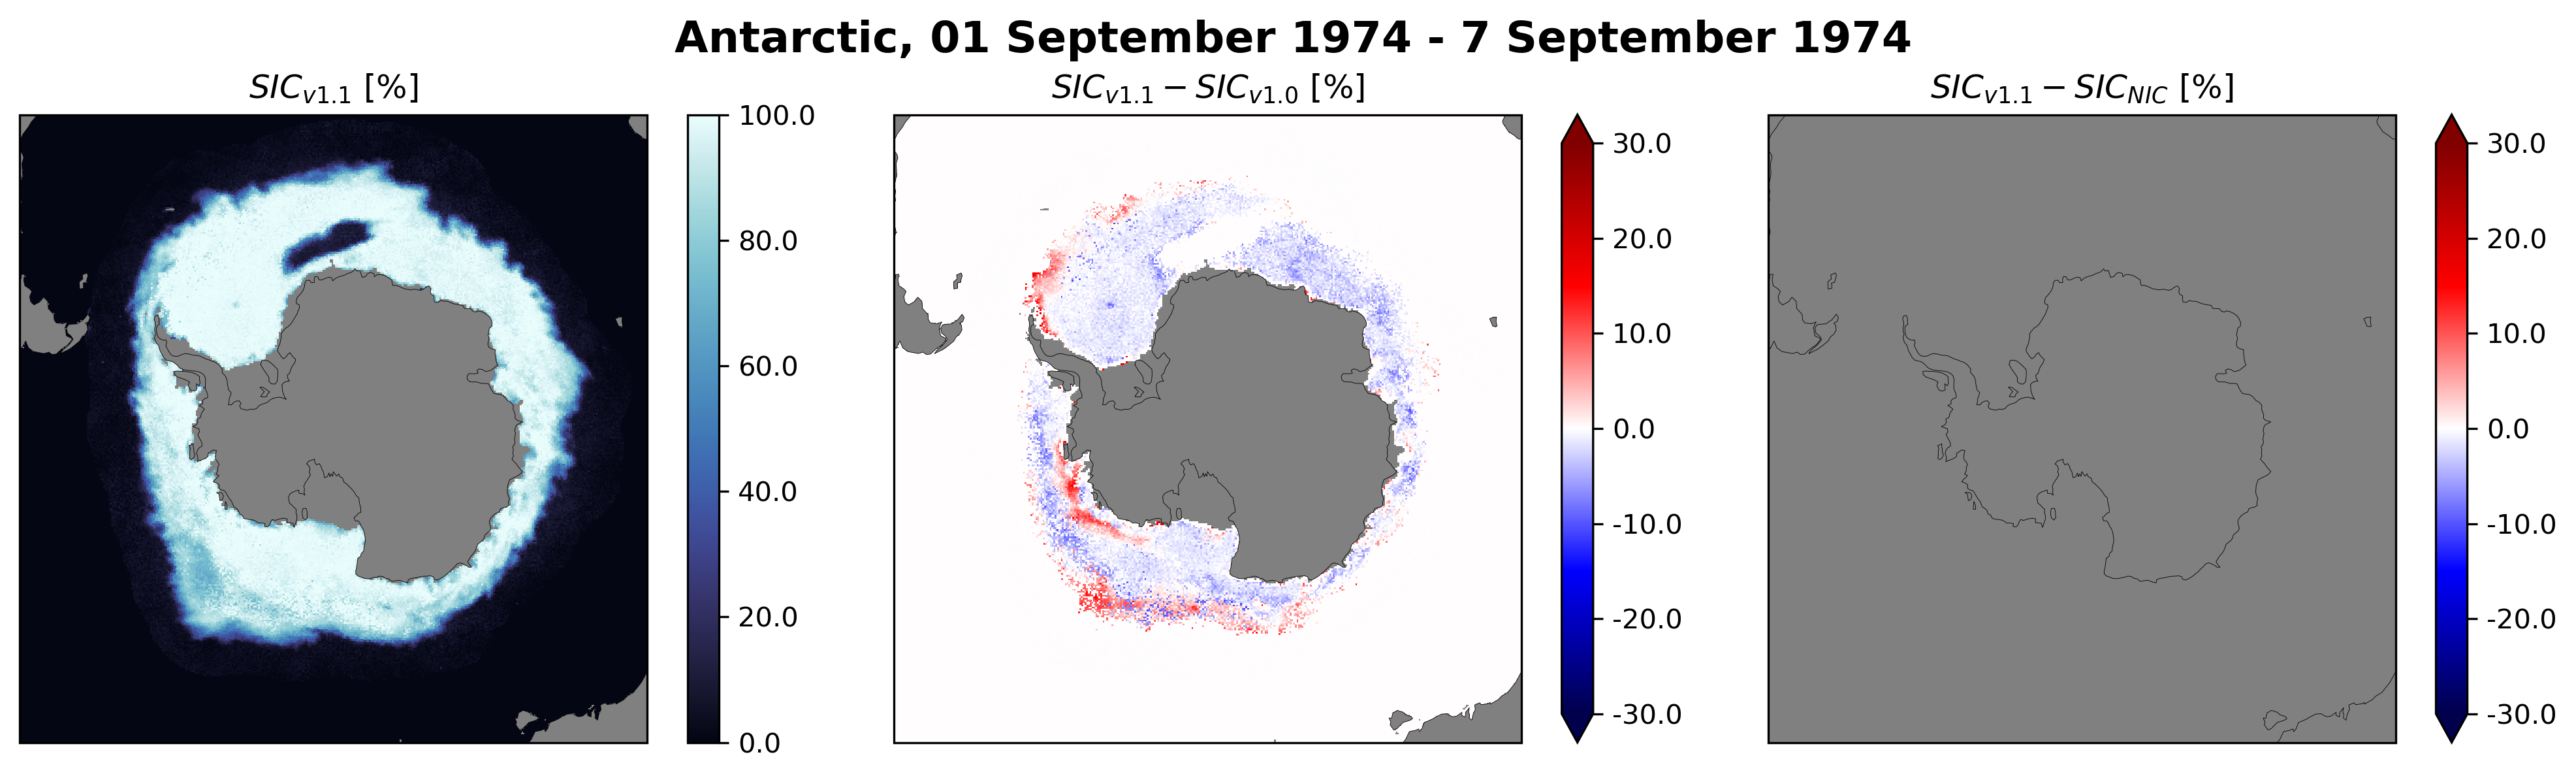

In [11]:


# defining reference frame
if HEMISPHERE == 'NH':
    proj = ccrs.Orthographic(0,90)
    _crs = ccrs.NorthPolarStereo(central_longitude=0)
    scale = 4000000
    name = 'Arctic'
elif HEMISPHERE == 'SH':
    proj = ccrs.Orthographic(0,-90)
    _crs = ccrs.SouthPolarStereo()
    scale = 5000000
    name = 'Antarctic'

land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='none',
                                        facecolor=np.array([0.5,0.5,0.5]))

fig, ax = plt.subplots(1,3,figsize=(13.5, 4),layout='tight', subplot_kw={'projection': proj},dpi=300)
im = ax[0].pcolormesh(lon,lat, LDTP_SIC, vmin=0,vmax=100, transform=ccrs.PlateCarree(), cmap=cmo.ice)
fig.colorbar(im,format='%.1f')
ax[0].set_title('$SIC_{v1.1}$ [%]')
im = ax[1].pcolormesh(lon,lat, SIC_diff, vmin=-30,vmax=30, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='both')
ax[1].set_title('$SIC_{v1.1} - SIC_{v1.0}$ [%]')
#im = ax[2].pcolormesh(lon,lat, SIC_diff, vmin=-30,vmax=30, transform=ccrs.PlateCarree(), cmap='seismic')
#fig.colorbar(im,format='%.1f',extend='both')

im = ax[2].pcolormesh(IC_ds['lon'],IC_ds['lat'],IC_ds['Difference'], vmin=-30,vmax=30, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='both')
ax[2].set_title('$SIC_{v1.1} - SIC_{NIC}$ [%]')
#ax[2].axis('off')

for axs in ax.ravel():
    axs.add_feature(land)
    axs.coastlines(resolution='110m', color='black', linewidth=0.2)
    axs.set_facecolor("gray")
    axs.set_extent((-scale, scale, -scale, scale), crs=_crs)
    #gls = axs.gridlines(alpha=0.2,lw=1,ls=':',draw_labels=True, dms=True, x_inline=False, y_inline=True,color='red', ylabel_style=dict(color='red'),rotate_labels=False  ,ylocs=[60,70,80])
fig.suptitle(name+', ' + '01 September 1974 - 7 September 1974', fontsize=16, fontweight='bold')
plt.show()


# Analysis

In [ ]:
def MYI_Mask(lat,lon):
    mask = np.ones(lat.shape).astype(bool)
    mask[lat>88]=False
    mask[lat<80]=False
    mask[lon>-17]=False
    mask[lon<-170]=False
    mask[(lat<84) & (lon>-105)]=False

    return mask

def FYI_Mask(lat,lon):
    mask1 = np.zeros(lat.shape).astype(bool)
    mask2 = np.zeros(lat.shape).astype(bool)
    mask3 = np.zeros(lat.shape).astype(bool)
    mask1[240:255,140:155] = True
    mask2[215:240,75:90] = True
    mask3[219:234,259:275]= True
    return (mask1 | mask2 | mask3)


In [31]:
IC_ds

<xarray.Dataset>
Dimensions:     (xc: 280, yc: 280)
Coordinates:
  * xc          (xc) float64 -3.488e+03 -3.462e+03 ... 3.462e+03 3.488e+03
  * yc          (yc) float64 3.488e+03 3.462e+03 ... -3.462e+03 -3.488e+03
    lat         (yc, xc) float32 44.58 44.76 44.93 45.1 ... 44.93 44.76 44.58
    lon         (yc, xc) float32 -135.0 -135.2 -135.4 ... 44.59 44.79 45.0
    time        object ...
    source      object ...
Data variables:
    ESMR        (yc, xc) float32 ...
    NIC         (yc, xc) float32 ...
    Difference  (yc, xc) float32 nan nan 0.0 0.0 0.0 0.0 ... nan nan nan nan nan

In [30]:
LDTP_ds

<xarray.Dataset>
Dimensions:                   (time: 7, yc: 432, xc: 432, nv: 2)
Coordinates:
  * time                      (time) datetime64[ns] 1975-01-29T12:00:00 ... 1...
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    raw_ice_conc_values       (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    algorithm_standard_error  (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    Tb_corr                   (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    Tb                        (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    smearing_standard_error   (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    total_standard_error      (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    status_flag               (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    ice_conc                  (time, yc, xc) float32 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    Lambert_Azimuthal_Grid    (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/39)
    description:               Weather related data.
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    opiccategory:              Oceans Climatology Meteorology Atmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    ...                        ...
    contributor_role:          PrincipalInvestigator, Co-Investigator, Co-Inv...
    product_version:           1.1
    tracking_id:               1d1ffe79-e70c-4012-80d5-b9dcd9d621ce
    naming_authority:          esa.int
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  Using Standard Name Table Version 78 (2021-09-...

In [65]:
new_FYI = np.zeros(IC_ds['Difference'].shape,dtype=bool)
new_FYI[162:175,67:77] = True
new_FYI[145:155,180:195] = True

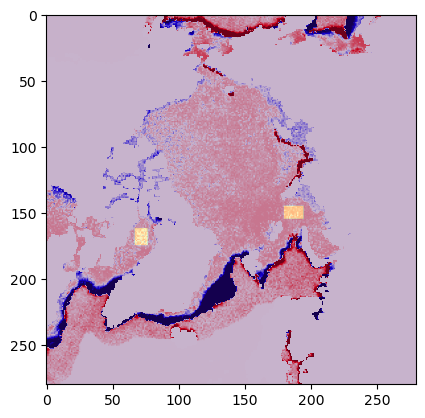

In [66]:
plt.imshow(IC_ds['Difference'],vmin=-30,vmax=30,cmap='seismic')
plt.imshow(new_FYI,alpha=0.3)

In [46]:
FYImask = FYI_Mask(lat,lon)
mlat = LDTP_ds['lat'].values[FYImask]
mlon = LDTP_ds['lon'].values[FYImask]

In [ ]:
MYImask= MYI_Mask(lat,lon)
FYImask = FYI_Mask(lat,lon)
print('avg SIC difference between LDTP and Kolbe:')
print('MYI:', np.mean(SIC_diff[MYImask]))
print('FYI:', np.mean(SIC_diff[FYImask]))

MYImask= MYI_Mask(IC_ds['lat'],IC_ds['lon'])

print('avg SIC difference between LDTP and Ice charts:')
print('MYI:', np.mean(IC_ds['Difference'].values[MYImask]))
print('FYI:', np.mean(IC_ds['Difference'].values[new_FYI]))


avg SIC difference between LDTP and Kolbe:
MYI: 9.024038
FYI: -2.013985
avg SIC difference between LDTP and Ice charts:
MYI: 2.489163
FYI: 2.911789


In [68]:
np.mean([np.mean(IC_ds['Difference'].values[MYImask]), np.mean(IC_ds['Difference'].values[new_FYI])])

2.700476